# Filtracja Non-Local Means

## Definicja

Kolejny "poziom wtajemniczenia" w zagadnienie filtracji obrazów to metoda Non-Local Means (NLM).
Została ona zaproponowana w pracy *A non-local algorithm for image denoising* autorstwa Antoni Buades, Bartomeu Coll, i Jean Michel Morel na konferencji CVPR w 2005 roku.

Filtr NLM dany jest zależnością:

\begin{equation}
\hat{I}(\mathbf{x}) = \sum_{\mathbf{p} \in V(\mathbf{x})} w(\mathbf{p},\mathbf{x})I(\mathbf{p})
\end{equation}

gdzie:
- $I$ - obraz wejściowy,
- $\hat{I}$ - obraz wyjściowy (przefiltrowany),
- $\mathbf{x}$ - współrzędne piksela obrazu,
- $V(\mathbf{x})$ - obszar poszukiwań piksela, dla którego przeprowadzana jest filtracja,
- $w$ - waga punktu $\mathbf{p}$ z obszaru poszukiwań.

Wróćmy na chwilę do filtracji bilateralnej. Tam waga danego piksela z kontekstu zależała od dwóch czynników - odległości przestrzennej pomiędzy pikselami oraz różnicy w jasności/kolorze pomiędzy pikselami (tzw. przeciwdziedzina).
Filtr NLM stanowi uogólnienie tej metody - do obliczania wag nie wykorzystuje się już pojedynczych pikseli ($\mathbf{p}$ i $\mathbf{x}$), a lokalne konteksty ($N(\mathbf{p})$ i $N(\mathbf{x})$).

Waga $w$ dana jest następującą zależnością:

\begin{equation}
w(\mathbf{p},\mathbf{x}) = \frac{1}{Z(\mathbf{x})}\exp(-\frac{|| v(N(\mathbf{p})) - v(N(\mathbf{x})) ||^2_{2}}{\alpha \sigma^2})
\end{equation}

gdzie:
- 

\begin{equation}
Z(\mathbf{x}) = \sum_{\mathbf{p} \in  V(\mathbf{x})} \exp(-\frac{|| v(N(\mathbf{p})) - v(N(\mathbf{x})) ||^2_{2}}{\alpha \sigma^2})
\end{equation},
- $|| \cdot ||$ - jest normą $L_2$ odległości pomiędzy dwoma kontekstami,
- $v$ oznacza mnożenie punktowe kontekstu $N$ przez dwuwymiarową maskę Gaussa o odpowiadających kontekstowi wymiarach,
- $\alpha$ > 0 - parametr sterujący filtracją,
- $\sigma$ - parametr szumu stacjonarnego występującego na obrazie (w przypadku szumu niestacjonarnego, parametr $\sigma$ musi zostać dopasowany lokalnie tj. $\sigma = \sigma(\mathbf{x})$).

## Analiza działania

Zastanówmy sie teraz jak działa filtra NLM. Najprościej to zrozumieć na rysunku.

![Ilustracja NLM](https://raw.githubusercontent.com/vision-agh/poc_sw/master/07_Bilateral/nlm.png)

1. Dla rozważanego piksela $\mathbf{x}$ definiujemy obszar poszukiwań $V(\mathbf{x})$. Uwaga - obszar poszukiwań ($V$) jest jednostką większą niż otocznie/kontekst ($N$).

2. Następnie, dla każdego z pikseli $\mathbf{p} \in  V(\mathbf{x})$ oraz samego $\mathbf{x}$ definiujemy otocznie/kontekst odpowiednio $N(\mathbf{p})$ i $N(\mathbf{x})$.

3. Wracamy do równania definiującego wagę  $w(\mathbf{p},\mathbf{x})$, a konkretnie do wyrażenia $|| v(N(\mathbf{p})) - v(N(\mathbf{x})) ||$. Przeanalizujmy co ono oznacza. Mamy dwa otoczenia: $N(\mathbf{p})$ i $N(\mathbf{x})$. Każde z nich mnożymy przez odpowiadającą maskę Gaussa - funkcja $v$. Otrzymujemy dwie macierze, które odejmujemy od siebie punktowo. Następnie obliczamy kwadrat z normy ($L_2$ definiujemy jako $||X||_2 = \sqrt{\sum_k|X_k|^2}$. Otrzymujemy zatem jedną liczbę, która opisuje nam podobieństwo otoczeń pikseli $\mathbf{x}$ i $\mathbf{p}$. Mała wartość oznacza otoczenia zbliżone, duża - różniące się. Ponieważ, z dokładnością do stałych, liczba ta stanowi wykładnik funkcji $e^{-x}$, to ostatecznie waga jest zbliżona do 1 dla otoczeń podobnych, a szybko maleje wraz z malejącym podobieństwem kontekstów.

4. Podsumowując. Jak wynika z powyższej analizy filtr NLM to taki filtr bilateralny, w którym zamiast pojedynczych pikseli porównuje się ich lokalne otoczenia. Wpływa to pozytywnie na jakość filtracji, niestety kosztem złożoności obliczeniowej.

## Implementacja

W ramach zadania należy zaimplementować filtr NLM, ocenić jego działanie w porównaniu do filtra Gaussa i bilateralnego oraz dokonać pomiaru czasu obliczeń (dla trzech wymienionych metod).

Jak już się zrozumie jak działa NLM, jego implementacja jest dość prosta.
Wartość parametru $\alpha$ należy dobrać eksperymentalnie.
Nie należy także "przesadzić" z rozmiarem obszaru poszukiwań (np. 11x11) oraz kontekstu (5x5 lub 3x3).

Wskazówki do implementacji:
- algorytm sprowadza się do dwóch podwójnych pętli for: zewnętrzne po pikselach, wewnętrzne po kolejnych obszarach przeszukań,
- przed realizacją trzeba przemyśleć problem pikseli brzegowych - de facto problemów jest kilka. Po pierwsze nie dla każdego piksela można wyznaczyć pełny obszar przeszukań (tu propozycja, aby filtrację przeprowadzać tylko dla pikseli z pełnym obszarem). Po drugie, ponieważ rozpatrujemy konteksty, to nawet dla piksela o "pełnym" obszarze przeszukań, będą istnieć piksele, dla których nie pełnych kontekstów (sugestia - powiększyć obszar przeszukać, tak aby zawierał konteksty). Ostatni problem jest bardziej techniczny/implementacyjny. Jeśli w kolejnych iteracjach "jawnie" wytniemy fragment o rozmiarach obszaru przeszukiwań, to znowu pojawi się problem brzegowy - tu można albo wyciąć nieco większy obszar, albo cały czas "pracować" na obrazie oryginalnym ("żonglerka indeksami").
- warto sprawdzać indeksy i rozmiary "wycinanych" kontekstów,
- wagi wyliczamy w trzech krokach:
    - obliczenia dla $N(\mathbf{x})$ + inicjalizacja macierzy na wagi,
    - podwójna pętla, w której przeprowadzamy obliczenia dla kolejnych $N(\mathbf{p})$ oraz wyliczamy wagi,
    - normalizacja macierzy wag oraz końcowa filtracja obszaru w wykorzystaniem wag.
- uwaga, obliczenia trochę trwają, nawet dla obrazka 256x256 i względnie niewielkich obszaru przeszukań i kontesktu.

Efekt końcowy:
- porównanie wyników metod: filtr Gaussa, filtr bilateralny oraz filtr NLM (2-3 zdania komentarza),
- porównanie czasu działania powyższych metod (1 zdanie komentarza).


In [50]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal
from scipy.io import loadmat
import math
from time import time

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/07_Bilateral/'

fileNames = ["MR_data.mat"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)


def show_all(images = [], vertical = False):
    def append_plot(ax, image):
        ax.imshow(image, 'gray')

    n = len(images)
    shorter_side = 10
    longer_side = 5 * len(images)

    if vertical:
        fig, axs = plt.subplots( n, 1 )
        fig.set_size_inches(shorter_side, longer_side)
    else:
        fig, axs = plt.subplots( 1, n )
        fig.set_size_inches(longer_side, shorter_side)


    if len(images) == 1:
        image = images[0]
        append_plot(axs, image)
    else:
        for i in range(len(images)):
            image = images[i]
            append_plot(axs[i], image)
    plt.show()

def open_image(path, gray = True):
    image = loadmat(path)
    return image

image_mr = open_image(fileNames[0])

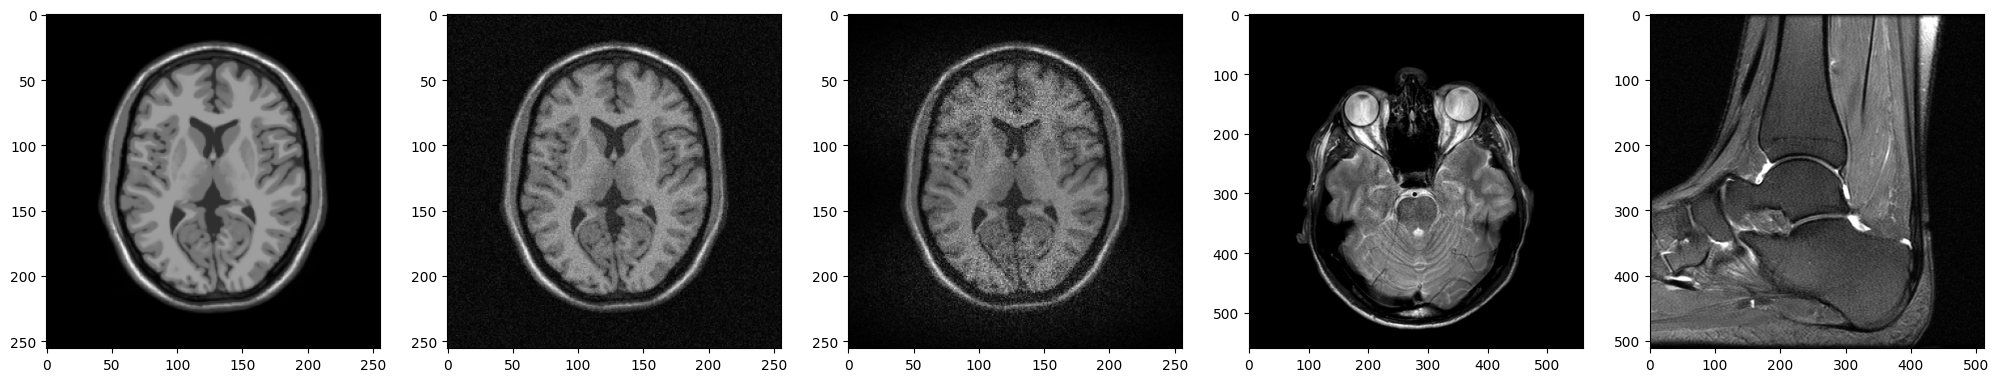

In [51]:
show_all([image_mr['I_noisefree'],image_mr['I_noisy1'],image_mr['I_noisy2'],image_mr['I_noisy3'],image_mr['I_noisy4']])

In [52]:
def fgaussian(size, sigma):
    m = n = size
    h, k = m//2, n//2
    x, y = np.mgrid[-h:h+1, -k:k+1]
    g = np.exp(-(x**2 + y**2)/(2*sigma**2))
    return g /g.sum() 

def use_convolution(window, mask):
    wn = 1 / mask.sum()
    return wn * np.sum(window * mask)

def classic_convolution(image, window_size, variance):
    mask = fgaussian(window_size, variance)
    image_copy = image.copy()
    border = window_size // 2
    
    for row in range(border, image.shape[0] - border):
        for col in range(border, image.shape[1] - border):
            window = image[
                row - border: row + border + 1, 
                col - border: col + border + 1
            ]
    
            image_copy[row, col] = use_convolution(window, mask)

    return image_copy


In [53]:
def gamma(y, variance_r):
    return np.exp(- (y ** 2) / (2 * variance_r ** 2))

def use_bilateral_convolution(
    window, 
    mask, 
    variance_r
):
    window_center = window.shape[0] // 2 + 1
    psi = mask * gamma(np.abs(window - window[window_center, window_center]), variance_r)
    wn = psi.sum()
    return 1 / wn * np.sum(psi * window)

def bilateral_filtration(image, window_size, variance, variance_r):
    mask = fgaussian(window_size, variance)
    image_copy = image.copy()
    border = window_size // 2
    
    for row in range(border, image.shape[0] - border):
        for col in range(border, image.shape[1] - border):
            window = image[
                row - border: row + border + 1, 
                col - border: col + border + 1
            ]
    
            image_copy[row, col] = use_bilateral_convolution(window, mask, variance_r)

    return image_copy

In [54]:
def nlm_context_filtration(context, mask, size_v, size_n, alpha, variance_r):
    
    border = size_n // 2
    height, width = context.shape

    middle_row = height // 2
    middle_col = width // 2

    point_p = context[middle_row, middle_col]
    window_p = context[
        middle_row - border: middle_row + border + 1, 
        middle_col - border: middle_col + border + 1
    ]

    def get_l2_norm(window):
        nonlocal window_p, mask
        return np.sqrt(np.sum(mask * window - mask * window_p) ** 2)

    def get_weight(window):
        nonlocal alpha, variance_r
        return np.exp( - get_l2_norm(window) / (alpha * (variance_r ** 2)))

    total_weight = 0
    total_value = 0

    for i in range(border, height - border):
        for j in range(border, width - border):
            window = context[i - border: i + border + 1, j - border: j + border + 1]
            weight = get_weight(window)
            total_weight += weight
            total_value += weight * point_p
    
    return total_value / total_weight
    

def nlm_filtration(image, size_v, size_n, alpha, variance, variance_r):
    mask = fgaussian(size_n, variance)

    border = size_v // 2 + size_n // 2

    height, width = image.shape

    result = image.copy()

    for i in range(border, height - border):
        for j in range(border, width - border):
            context = image[i - border: i + border + 1, j - border: j + border + 1]
            result[i, j] = nlm_context_filtration(context, mask, size_v, size_n, alpha, variance_r)

    return result

In [55]:
def compare_results(image, result_image):
    show_all([image, result_image, image - result_image])

def plot_bar_chart(dictionary):
    fig, ax = plt.subplots()

    names = []
    counts = []

    for key, value in dictionary.items():
        names += [key]
        counts += [value]
    
    bar_container = ax.bar(names, counts)
    ax.set(ylabel = "Time in seconds", title="Time")
    ax.bar_label(bar_container)
    pass

def compare_methods(image, window_size, size_v, size_n, alpha, variance, variance_r):
    times = {}
    
    start_time_classic = time()
    image_classic_conv = classic_convolution(image, window_size, variance)
    times['classic'] = time() - start_time_classic
    compare_results(image, image_classic_conv)

    start_time_bilateral = time()
    image_bilateral = bilateral_filtration(image, window_size, variance, variance_r)
    times['bilateral'] = time() - start_time_bilateral
    compare_results(image, image_bilateral)

    start_time_nlm = time()
    image_nlm = nlm_filtration(image, size_v, size_n, alpha, variance, variance_r)
    times['nlm'] = time() - start_time_nlm
    compare_results(image, image_nlm)

    plot_bar_chart(times)

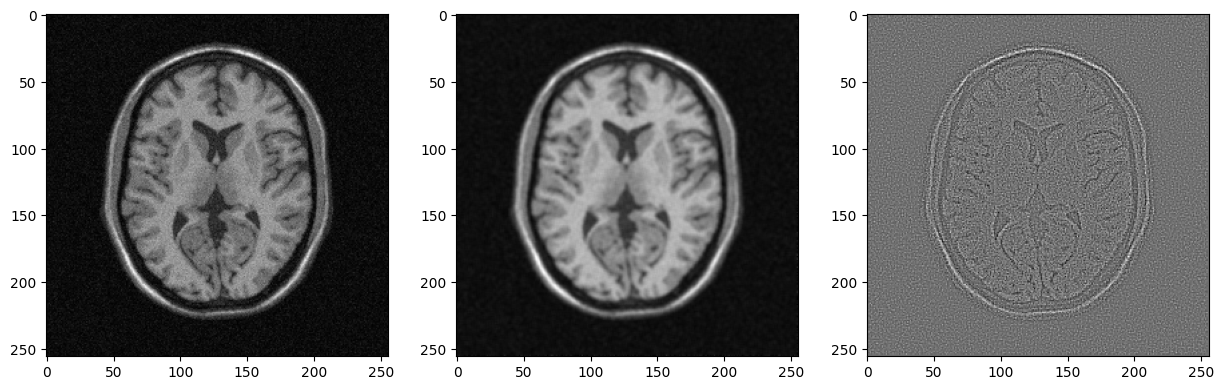

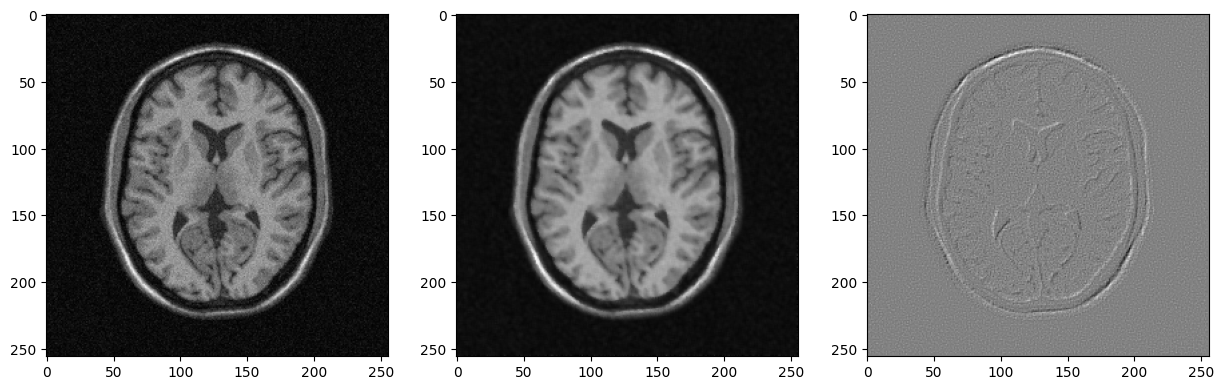

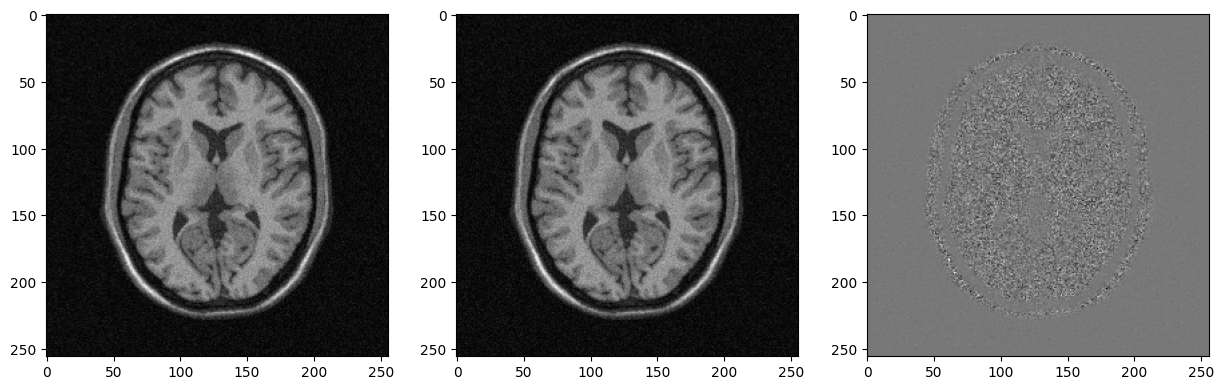

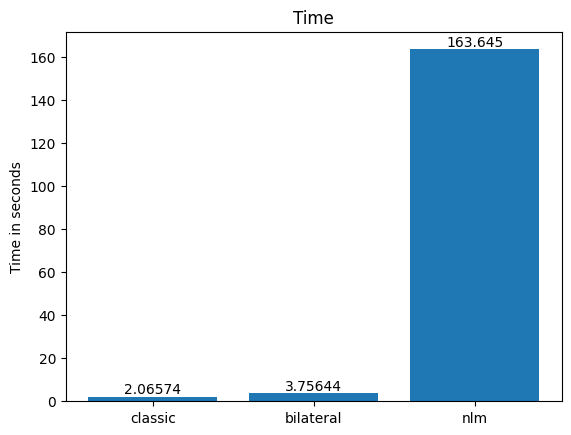

In [62]:
compare_methods(image_mr['I_noisy1'], 3, 9, 3, 8, 15, 40 )

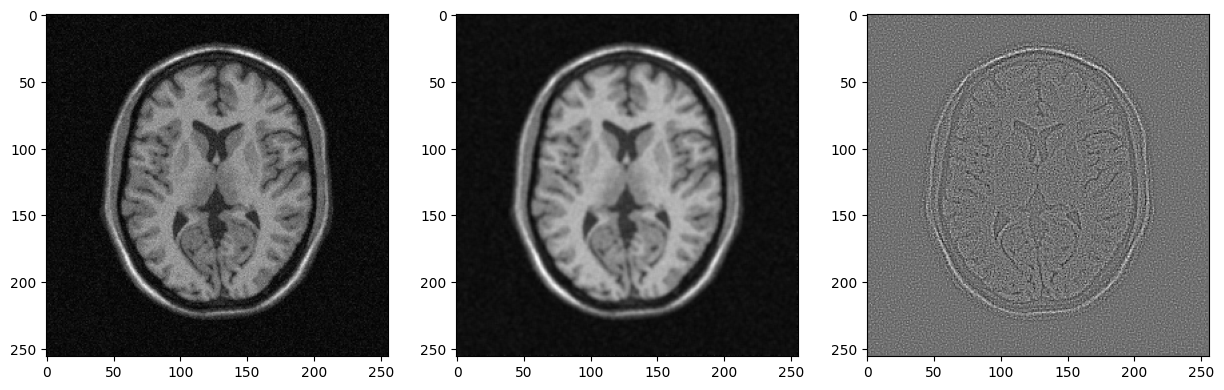

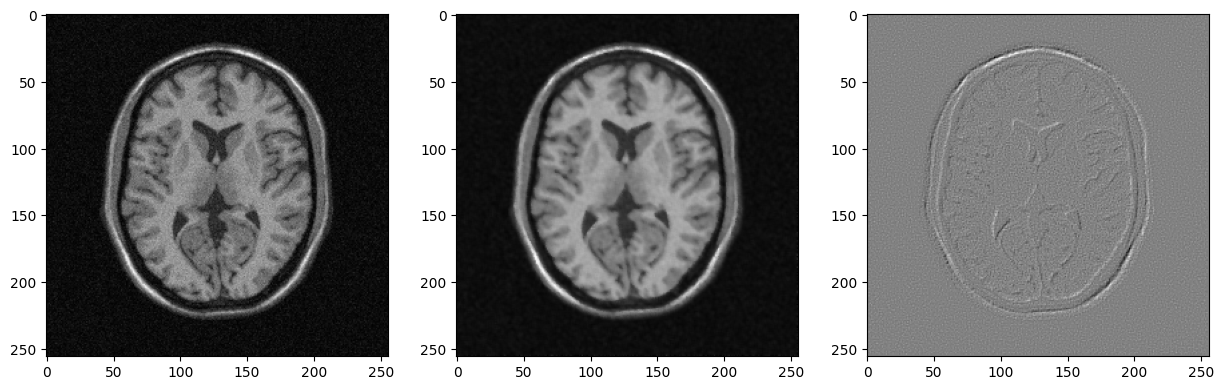

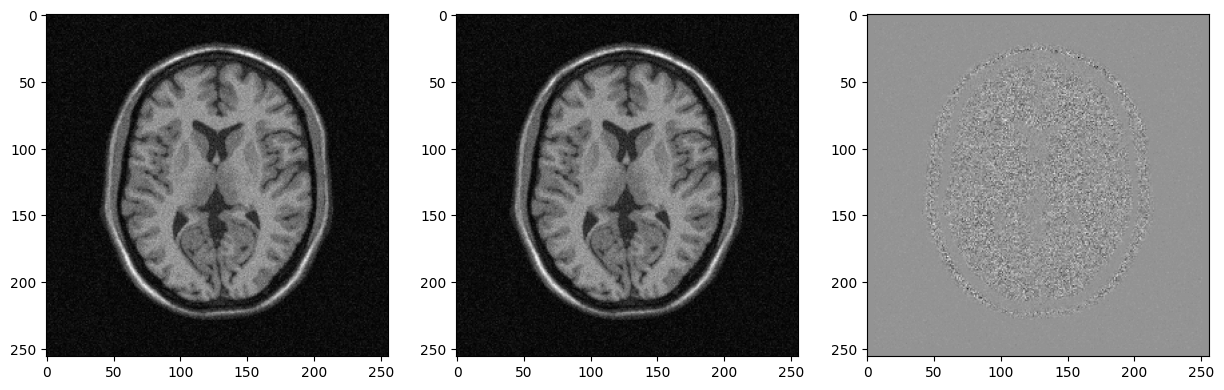

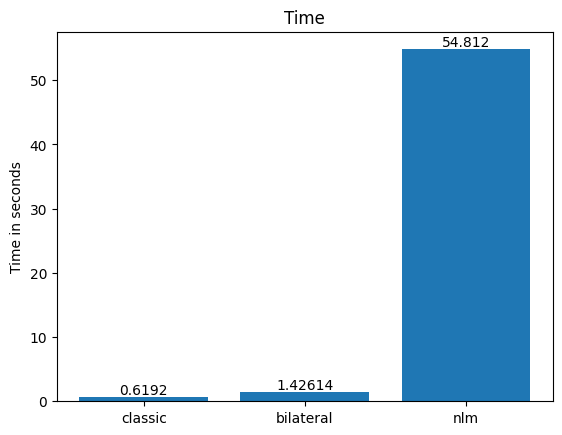

In [57]:
compare_methods(image_mr['I_noisy1'], 3, 9, 3, 8, 2, 40 )


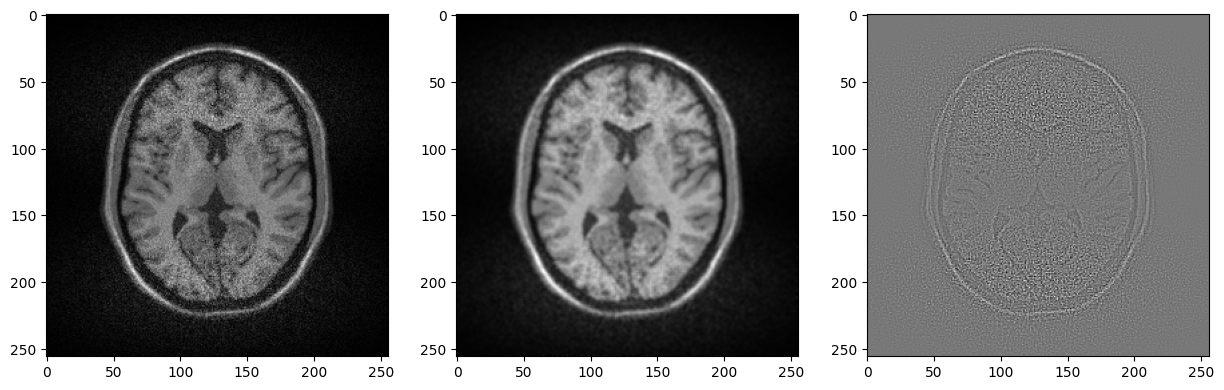

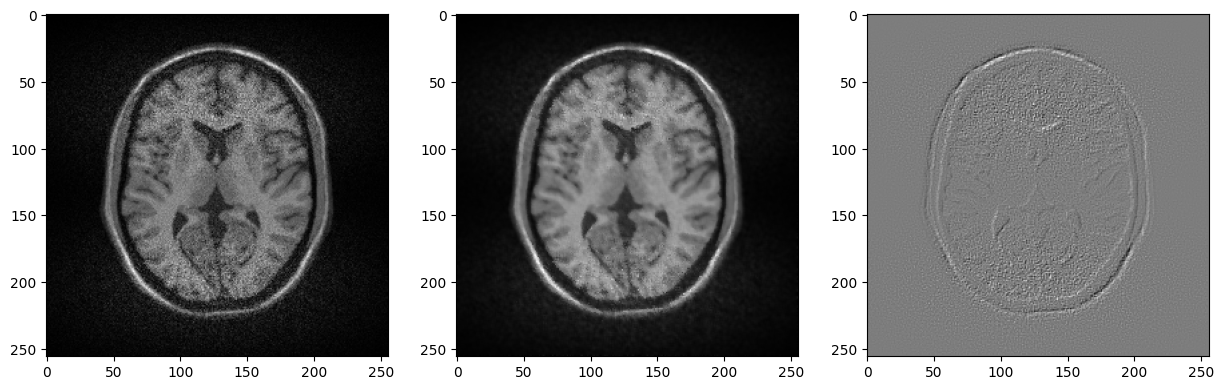

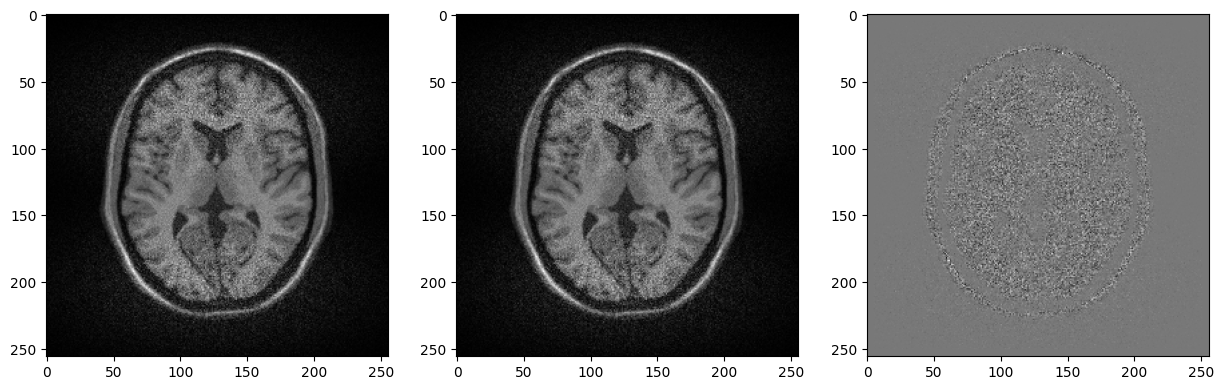

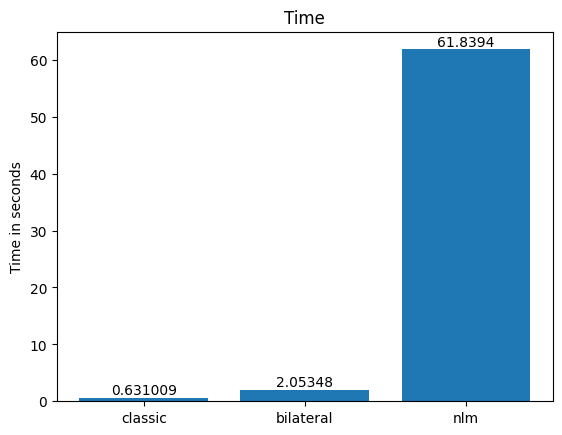

In [58]:
compare_methods(image_mr['I_noisy2'], 3, 9, 3, 8, 2, 40 )

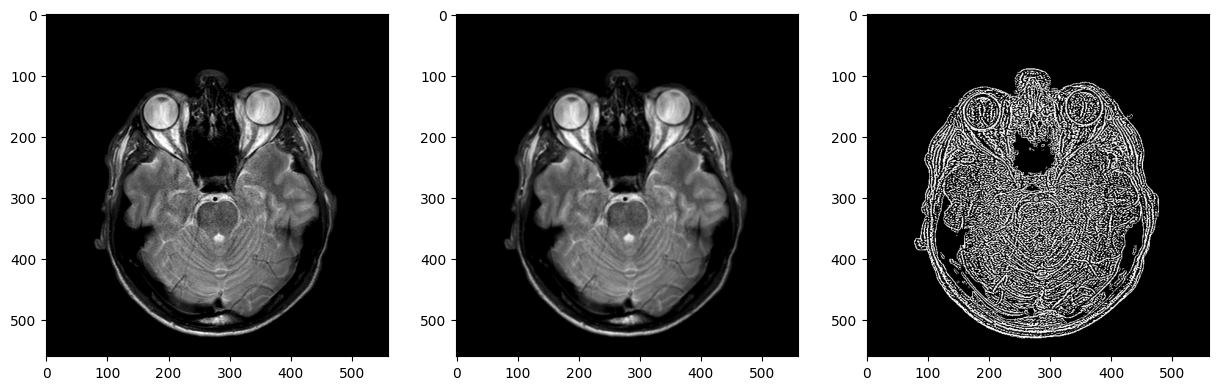

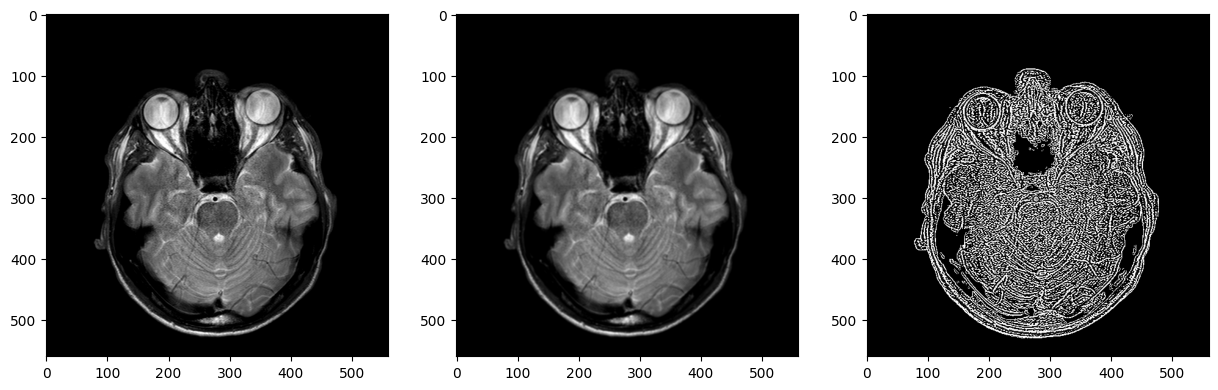

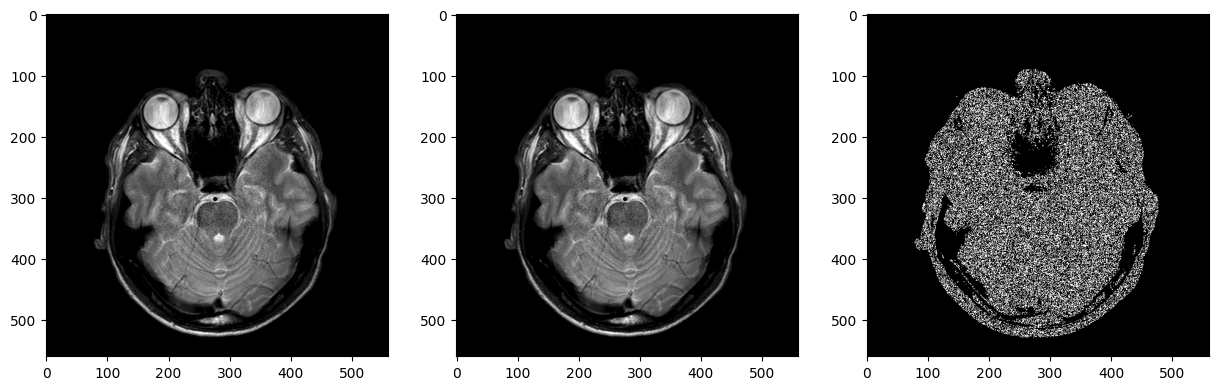

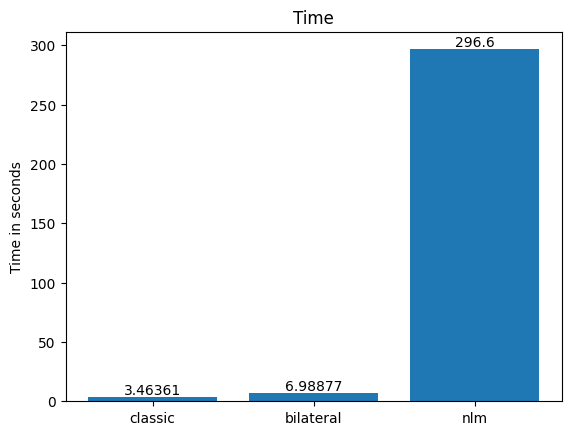

In [59]:
compare_methods(image_mr['I_noisy3'], 3, 9, 3, 8, 2, 40 )

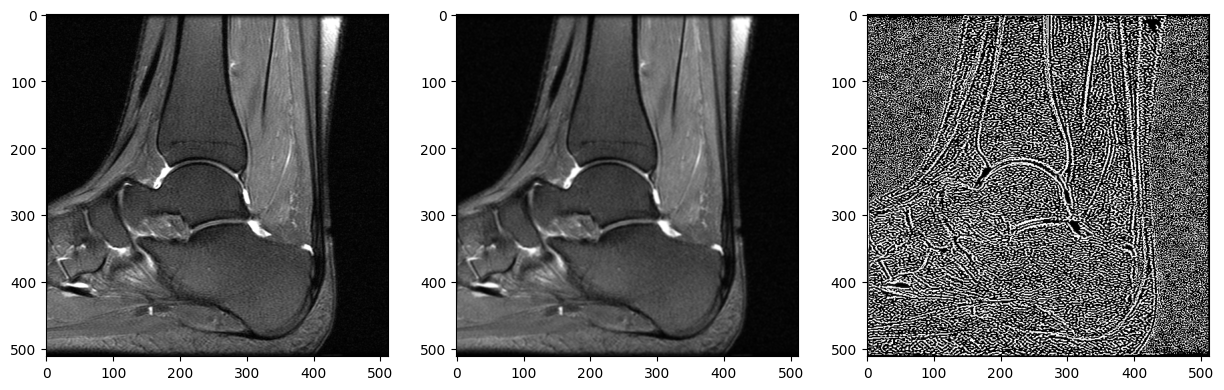

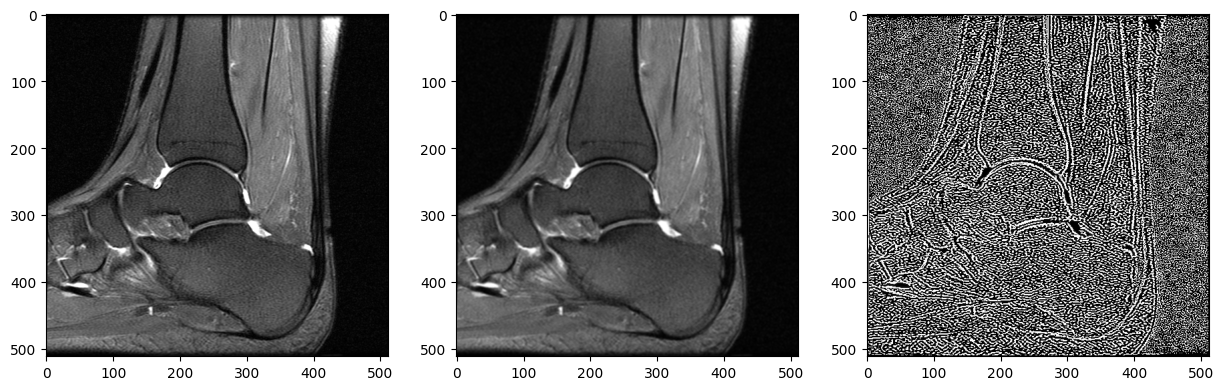

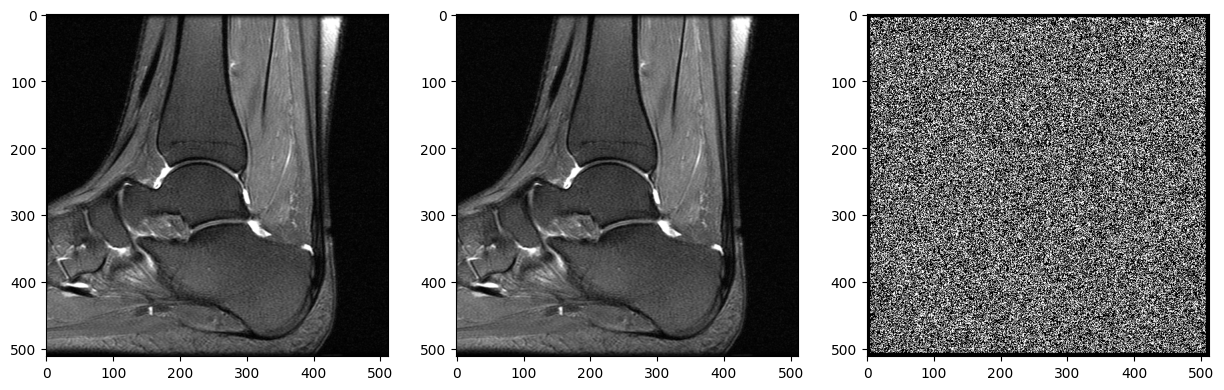

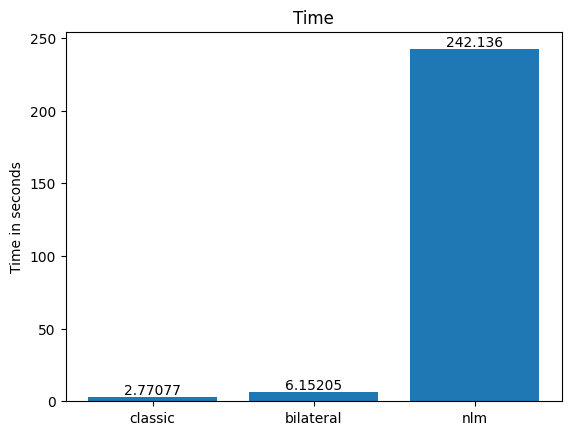

In [60]:
compare_methods(image_mr['I_noisy4'], 3, 9, 3, 8, 2, 40 )

Jak możemy zauważyć, najlepsze efekty możemy uzyskać wykorzystując filtr nlm. Spośród wszystkich trzech metod, to właśnie nlm pozbył się najwięcej szumu z wnętrza mózgu. Dodatkowo, obrazy przefiltrowane z wykorzystaniem metody klasycznej oraz bilateralnej wydają się być o wiele mniej ostrzejsze. Widać, że filtr nlm o wiele lepiej skupia się na samych szumach.

Robił to natomiast zdecydowanie większym kosztem czasowym oraz złożoności obliczeniowej - gdy wykonanie klasycznej czy bilateralnej filtracji nie przekraczało 2s, wykonanie filtracji nlm zbliżało się do okolic 1 minuty. W przypadku bardziej skomplikowanych, zaszumionych zdjęć różnica ta wynosiła nawet 6s do 252s!